In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

# Importing and EDA

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
df.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [6]:
fig1 = px.scatter(df, x='date', y='num_sold', color='product', title='Number of sold items per date')
fig1.update_layout(
    bargap=0.2
)

fig2 = px.histogram(df, x='country', y='num_sold', color='store', pattern_shape='product', title='Number sold per country')
fig2.update_layout(
    bargap=0.2
)

fig3 = px.histogram(df, y='num_sold', x='product', title='Number sold per product')
fig3.update_layout(
    bargap=0.2
)

fig1.show()
fig3.show()
fig2.show()

In [7]:
def accuracy_smape(real, preds):
    """Function to calculate accuracy using SMAPE"""
    return 1/len(real) * np.sum(2 * np.abs(real - preds) / (np.abs(real) + np.abs(preds)) * 100)

In [8]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


# Data cleaning
Need to change all "object" into correct type

In [10]:
from sklearn.preprocessing import RobustScaler

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.drop('row_id', axis=1, inplace=True)
    # Make categorical data from datetime: 
    # inspo from https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn
    df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True).astype(int)
    df['date'] = pd.to_datetime(df['date'])
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_month'] = df['date'].dt.days_in_month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.weekday
    df['weekend'] = ((df['date'].dt.dayofweek //5 == 1).astype(int))
    df['quarter'] = df['date'].dt.quarter
    df['week'] = df['date'].dt.isocalendar().week.astype(int)
    df['week'][df['week'] > 52] = 52

    # Encode categorical columns
    df = pd.get_dummies(df, columns=['country', 'store', 'product'])
    
    # Normalise num_sold
    # TODO: Needs to be done in global namespace to do inverse???
    df['num_sold'] = RobustScaler().fit_transform(df['num_sold'].values.reshape(-1,1))

    return df

clean_data(df).head() # Doesnt do anything, just shows first rows of example

/var/folders/9_/rk7dk39d043179z12bq8k72w0000gn/T/ipykernel_11499/342294445.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,num_sold,year,month,day,day_of_year,day_of_month,day_of_week,weekday,weekend,quarter,week,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,2015-01-01,0.043750,2015,1,1,1,31,3,3,0,1,1,1,0,0,1,0,0,1,0
1,2015-01-01,0.640625,2015,1,1,1,31,3,3,0,1,1,1,0,0,1,0,1,0,0
2,2015-01-01,-0.528125,2015,1,1,1,31,3,3,0,1,1,1,0,0,1,0,0,0,1
3,2015-01-01,0.803125,2015,1,1,1,31,3,3,0,1,1,1,0,0,0,1,0,1,0
4,2015-01-01,1.862500,2015,1,1,1,31,3,3,0,1,1,1,0,0,0,1,1,0,0


# Split into train and test dataset, time series so cant shuffle

/var/folders/9_/rk7dk39d043179z12bq8k72w0000gn/T/ipykernel_11499/342294445.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Evaluation accuracy: 45.08356835928752
Evaluation accuracy: 27.287118781459966


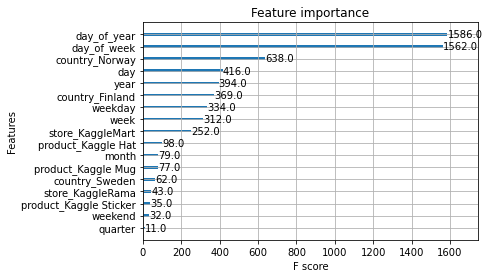

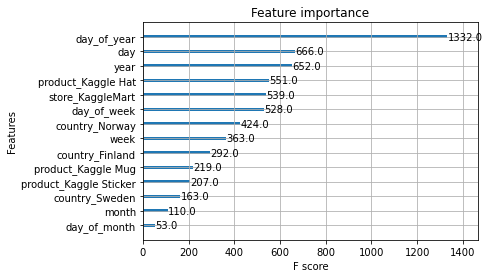

In [11]:
import xgboost as xgb
from xgboost import XGBRFRegressor

from sklearn.model_selection import train_test_split

train = clean_data(df)
train.drop('date', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train.drop('num_sold', axis=1), train['num_sold'], test_size=0.1, shuffle=False)
X_train.head()

model = XGBRFRegressor()
model.fit(X_train, y_train)
print(f"Evaluation accuracy: {accuracy_smape(model.predict(X_test), y_test)}")

xgb.plot_importance(model);

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
print(f"Evaluation accuracy: {accuracy_smape(model.predict(X_test), y_test)}")

xgb.plot_importance(model);


In [12]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe

space={
    'max_depth': hp.quniform("max_depth", 3, 10, 1),
    'eta': hp.uniform('eta', 0.01, 0.5),
    'gamma': hp.uniform ('gamma', 0, 5),
    'reg_alpha' : hp.quniform('reg_alpha', 0, 100, 1),
    'reg_lambda' : hp.uniform('reg_lambda', 0,1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 300,
    'seed': 42
}

In [13]:
def objective(space):
    reg = xgb.XGBRegressor(
        max_depth = int(space['max_depth']),
        gamma = float(space['gamma']),
        reg_alpha = float(space['reg_alpha']),
        reg_lambda = float(space['reg_lambda']),
        colsample_bytree = float(space['colsample_bytree']),
        min_child_weight = int(space['min_child_weight']),
        n_estimators = int(space['n_estimators']),
        seed = int(space['seed']),
    )

    evaluation = [(X_train, y_train), (X_test, y_test)]

    reg.fit(
        X_train, y_train,
        eval_set=evaluation,
        eval_metric='mape',
        verbose=False
    )
    pred = reg.predict(X_test)
    accuracy = accuracy_smape(y_test, pred)
    print(f'SCORE: {accuracy}')

    return {'loss': accuracy, 'status': STATUS_OK}

In [14]:
trials = Trials()

best_hyperparams = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials,
    rstate=np.random.RandomState(1)
)

SCORE: 40.8013319070383                               
SCORE: 35.64717010537719                                                      
SCORE: 35.16620614681189                                                       
SCORE: 35.599575125278506                                                      
SCORE: 37.98984839733435                                                       
SCORE: 36.269601528373954                                                      
SCORE: 39.2971116925744                                                        
SCORE: 32.3823071294813                                                        
SCORE: 40.896028852930314                                                      
SCORE: 39.38712237426061                                                      
100%|██████████| 10/10 [00:33<00:00,  3.35s/trial, best loss: 32.3823071294813]


In [19]:
print(f"The best hyperparameters are: {best_hyperparams}")

The best hyperparameters are: {'colsample_bytree': 0.7811839909293385, 'eta': 0.4101445103276018, 'gamma': 1.098458479584354, 'max_depth': 6.0, 'min_child_weight': 6.0, 'reg_alpha': 10.0, 'reg_lambda': 0.6497179282036987}


In [20]:
import math
def fourier_features(df):
    df = df.copy()
    day_of_year = pd.to_datetime(df['date']).dt.dayofyear
    for k in range(1,3):
        df[f'sin{k}'] = np.sin(day_of_year / 365 * 2 * math.pi * k)
        df[f'cos{k}'] = np.cos(day_of_year / 365 * 2 * math.pi * k)
        df[f'mug_sin{k}'] = df[f'sin{k}'] * df['product_Kaggle Mug']
        df[f'mug_cos{k}'] = df[f'cos{k}'] * df['product_Kaggle Mug']
        df[f'Hat_sin{k}'] = df[f'sin{k}'] * df['product_Kaggle Hat']
        df[f'Hat_cos{k}'] = df[f'cos{k}'] * df['product_Kaggle Hat']

    return df
fourier_features(clean_data(df)).head()

/var/folders/9_/rk7dk39d043179z12bq8k72w0000gn/T/ipykernel_11499/342294445.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,num_sold,year,month,day,day_of_year,day_of_month,day_of_week,weekday,weekend,...,mug_sin1,mug_cos1,Hat_sin1,Hat_cos1,sin2,cos2,mug_sin2,mug_cos2,Hat_sin2,Hat_cos2
0,2015-01-01,0.043750,2015,1,1,1,31,3,3,0,...,0.017213,0.999852,0.000000,0.000000,0.034422,0.999407,0.034422,0.999407,0.000000,0.000000
1,2015-01-01,0.640625,2015,1,1,1,31,3,3,0,...,0.000000,0.000000,0.017213,0.999852,0.034422,0.999407,0.000000,0.000000,0.034422,0.999407
2,2015-01-01,-0.528125,2015,1,1,1,31,3,3,0,...,0.000000,0.000000,0.000000,0.000000,0.034422,0.999407,0.000000,0.000000,0.000000,0.000000
3,2015-01-01,0.803125,2015,1,1,1,31,3,3,0,...,0.017213,0.999852,0.000000,0.000000,0.034422,0.999407,0.034422,0.999407,0.000000,0.000000
4,2015-01-01,1.862500,2015,1,1,1,31,3,3,0,...,0.000000,0.000000,0.017213,0.999852,0.034422,0.999407,0.000000,0.000000,0.034422,0.999407


In [21]:
train = clean_data(df)
train = fourier_features(train)
train.drop('date', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train.drop('num_sold', axis=1), train['num_sold'], test_size=0.1, shuffle=False)
X_train.head()

/var/folders/9_/rk7dk39d043179z12bq8k72w0000gn/T/ipykernel_11499/342294445.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,month,day,day_of_year,day_of_month,day_of_week,weekday,weekend,quarter,week,...,mug_sin1,mug_cos1,Hat_sin1,Hat_cos1,sin2,cos2,mug_sin2,mug_cos2,Hat_sin2,Hat_cos2
0,2015,1,1,1,31,3,3,0,1,1,...,0.017213,0.999852,0.000000,0.000000,0.034422,0.999407,0.034422,0.999407,0.000000,0.000000
1,2015,1,1,1,31,3,3,0,1,1,...,0.000000,0.000000,0.017213,0.999852,0.034422,0.999407,0.000000,0.000000,0.034422,0.999407
2,2015,1,1,1,31,3,3,0,1,1,...,0.000000,0.000000,0.000000,0.000000,0.034422,0.999407,0.000000,0.000000,0.000000,0.000000
3,2015,1,1,1,31,3,3,0,1,1,...,0.017213,0.999852,0.000000,0.000000,0.034422,0.999407,0.034422,0.999407,0.000000,0.000000
4,2015,1,1,1,31,3,3,0,1,1,...,0.000000,0.000000,0.017213,0.999852,0.034422,0.999407,0.000000,0.000000,0.034422,0.999407


[16:03:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Evaluation accuracy: 31.395752171483977


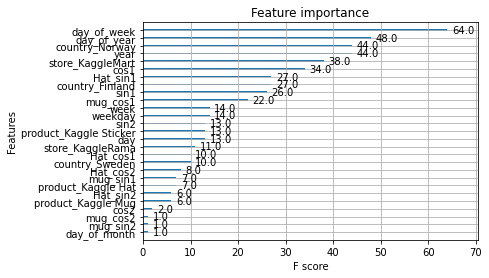

In [18]:
reg = xgb.XGBRegressor(
        max_depth = int(best_hyperparams['max_depth']),
        gamma = float(best_hyperparams['gamma']),
        reg_alpha = float(best_hyperparams['reg_alpha']),
        reg_lambda = float(best_hyperparams['reg_lambda']),
        colsample_bytree = float(best_hyperparams['colsample_bytree']),
        min_child_weight = int(best_hyperparams['min_child_weight']),
        n_estimators = 1000,
        verbose=True
        # n_estimators = int(best_hyperparams['n_estimators']),
        # seed = int(best_hyperparams['seed']),
    )
reg.fit(X_train, y_train)
print(f"Evaluation accuracy: {accuracy_smape(reg.predict(X_test), y_test)}")

xgb.plot_importance(reg);


INCLUDE TIME SERIES SPLIT from sklearn